In [180]:
import torch
from chamferdist import ChamferDistance

In [181]:
sample_mesh = torch.randn(3, 315).requires_grad_(True)

In [188]:
tpc = sample_mesh.detach().T.unsqueeze(0)
print(tpc.shape)
# spc = tpc + (torch.randn_like(tpc) * 0.05)
mirror_image = tpc * torch.tensor([[1, -1, 1]])

chamferDist = ChamferDistance()
dist_forward = chamferDist(tpc, mirror_image).detach()

torch.Size([1, 315, 3])


In [189]:
print(dist_forward)

tensor(52.1014)


In [190]:
rmse_per_dim = torch.sqrt(torch.mean((tpc - mirror_image) ** 2))
print(rmse_per_dim)

tensor(1.1179)


In [194]:
from pytorch3d.loss import chamfer_distance

In [175]:
import torch
import numpy as np
from pytorch3d.loss import chamfer_distance

def create_sphere_points(n_points, radius=1, noise=0):
    phi = np.random.uniform(0, np.pi, n_points)
    theta = np.random.uniform(0, 2*np.pi, n_points)
    
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    
    points = np.column_stack((x, y, z))
    points += np.random.normal(0, noise, points.shape)
    return torch.tensor(points, dtype=torch.float32)

def create_cube_points(n_points, side_length=2):
    points = np.random.uniform(-side_length/2, side_length/2, (n_points, 3))
    return torch.tensor(points, dtype=torch.float32)

# Create point clouds
n_points = 1000

# Similar point clouds (two slightly different spheres)
sphere1 = create_sphere_points(n_points, noise=0.05)
sphere2 = create_sphere_points(n_points, noise=0.05)

# Different point clouds (sphere and cube)
cube = create_cube_points(n_points)

# Calculate Chamfer distances
chamfer_similar, _ = chamfer_distance(sphere1.unsqueeze(0), sphere2.unsqueeze(0))
chamfer_different, _ = chamfer_distance(sphere1.unsqueeze(0), cube.unsqueeze(0))

print(f"Chamfer distance between similar point clouds (two spheres): {chamfer_similar.item():.6f}")
print(f"Chamfer distance between different point clouds (sphere and cube): {chamfer_different.item():.6f}")

# Calculate the ratio of distances
ratio = chamfer_different / chamfer_similar
print(f"Ratio of different to similar Chamfer distances: {ratio.item():.2f}")

Chamfer distance between similar point clouds (two spheres): 0.013533
Chamfer distance between different point clouds (sphere and cube): 0.077263
Ratio of different to similar Chamfer distances: 5.71


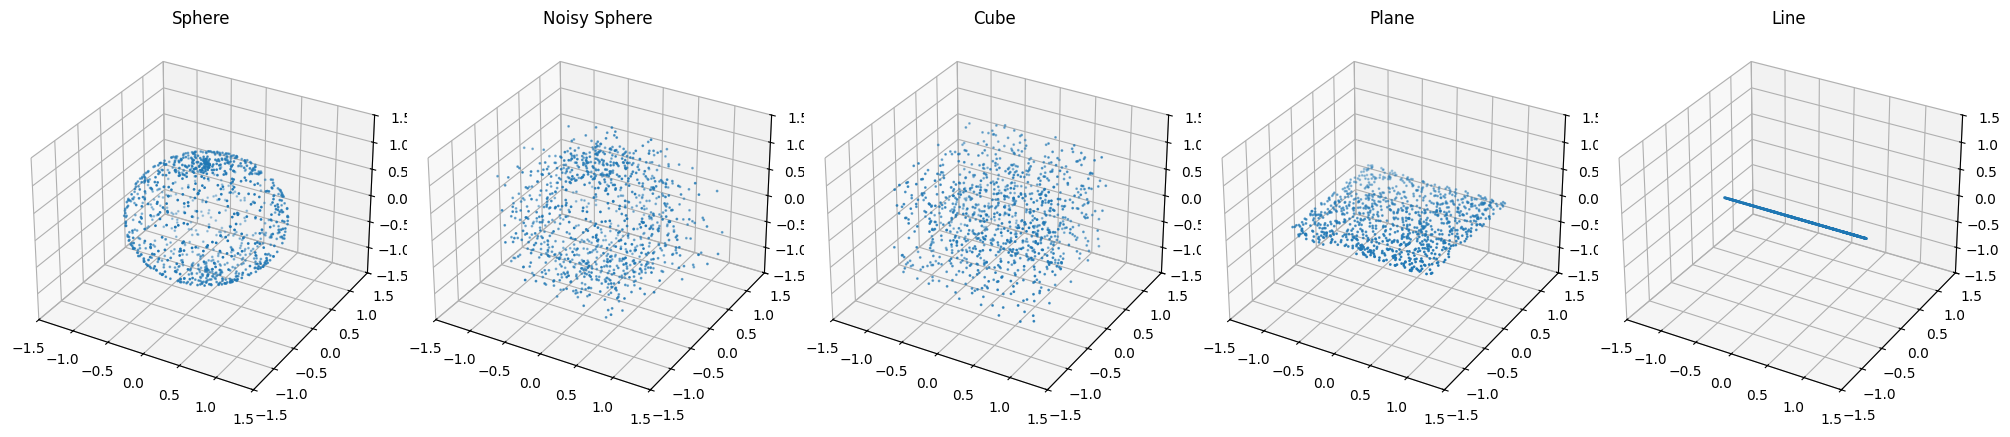

Chamfer distance between Sphere and Noisy Sphere: 0.055989
Chamfer distance between Sphere and Cube: 0.095326
Chamfer distance between Sphere and Plane: 0.627290
Chamfer distance between Sphere and Line: 1.077684
Chamfer distance between Noisy Sphere and Cube: 0.054257
Chamfer distance between Noisy Sphere and Plane: 0.556926
Chamfer distance between Noisy Sphere and Line: 0.855317
Chamfer distance between Cube and Plane: 0.340143
Chamfer distance between Cube and Line: 0.675290
Chamfer distance between Plane and Line: 0.340927

Ratios compared to Sphere vs Noisy Sphere:
Sphere vs Cube: 1.70
Sphere vs Plane: 11.20
Sphere vs Line: 19.25


In [176]:
import torch
import numpy as np
from pytorch3d.loss import chamfer_distance
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_sphere_points(n_points, radius=1, noise=0):
    phi = np.random.uniform(0, np.pi, n_points)
    theta = np.random.uniform(0, 2*np.pi, n_points)
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    points = np.column_stack((x, y, z))
    points += np.random.normal(0, noise, points.shape)
    return torch.tensor(points, dtype=torch.float32)

def create_cube_points(n_points, side_length=2):
    points = np.random.uniform(-side_length/2, side_length/2, (n_points, 3))
    return torch.tensor(points, dtype=torch.float32)

def create_plane_points(n_points, width=2, height=2):
    x = np.random.uniform(-width/2, width/2, n_points)
    y = np.random.uniform(-height/2, height/2, n_points)
    z = np.zeros(n_points)
    points = np.column_stack((x, y, z))
    return torch.tensor(points, dtype=torch.float32)

def create_line_points(n_points, length=2):
    x = np.random.uniform(-length/2, length/2, n_points)
    y = np.zeros(n_points)
    z = np.zeros(n_points)
    points = np.column_stack((x, y, z))
    return torch.tensor(points, dtype=torch.float32)

def plot_point_clouds(point_clouds, titles):
    fig = plt.figure(figsize=(20, 5))
    for i, (points, title) in enumerate(zip(point_clouds, titles)):
        ax = fig.add_subplot(1, len(point_clouds), i+1, projection='3d')
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)
        ax.set_title(title)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_zlim(-1.5, 1.5)
    plt.tight_layout()
    plt.show()

# Create point clouds
n_points = 1000
sphere = create_sphere_points(n_points)
noisy_sphere = create_sphere_points(n_points, noise=0.2)
cube = create_cube_points(n_points)
plane = create_plane_points(n_points)
line = create_line_points(n_points)

# Visualize point clouds
plot_point_clouds([sphere, noisy_sphere, cube, plane, line], 
                  ['Sphere', 'Noisy Sphere', 'Cube', 'Plane', 'Line'])

# Calculate Chamfer distances
shapes = [sphere, noisy_sphere, cube, plane, line]
shape_names = ['Sphere', 'Noisy Sphere', 'Cube', 'Plane', 'Line']

for i, shape1 in enumerate(shapes):
    for j, shape2 in enumerate(shapes[i+1:], start=i+1):
        distance, _ = chamfer_distance(shape1.unsqueeze(0), shape2.unsqueeze(0))
        print(f"Chamfer distance between {shape_names[i]} and {shape_names[j]}: {distance.item():.6f}")

# Calculate and print ratios
base_distance, _ = chamfer_distance(sphere.unsqueeze(0), noisy_sphere.unsqueeze(0))
print("\nRatios compared to Sphere vs Noisy Sphere:")
for i, shape in enumerate(shapes[2:], start=2):
    distance, _ = chamfer_distance(sphere.unsqueeze(0), shape.unsqueeze(0))
    ratio = distance / base_distance
    print(f"Sphere vs {shape_names[i]}: {ratio.item():.2f}")